In [2]:
library(data.table)
library(ggplot2)
library(lubridate)
library(corrplot)
library(maps)

In [8]:
database <- fread("database.csv",stringsAsFactors = T)

In [9]:
head(database)

         Date     Time Latitude Longitude       Type Depth Depth Error
1: 01/02/1965 13:44:18   19.246   145.616 Earthquake 131.6          NA
2: 01/04/1965 11:29:49    1.863   127.352 Earthquake  80.0          NA
3: 01/05/1965 18:05:58  -20.579  -173.972 Earthquake  20.0          NA
4: 01/08/1965 18:49:43  -59.076   -23.557 Earthquake  15.0          NA
5: 01/09/1965 13:32:50   11.938   126.427 Earthquake  15.0          NA
6: 01/10/1965 13:36:32  -13.405   166.629 Earthquake  35.0          NA
   Depth Seismic Stations Magnitude Magnitude Type Magnitude Error
1:                     NA       6.0             MW              NA
2:                     NA       5.8             MW              NA
3:                     NA       6.2             MW              NA
4:                     NA       5.8             MW              NA
5:                     NA       5.8             MW              NA
6:                     NA       6.7             MW              NA
   Magnitude Seismic Stations Azim

In [10]:
str(database)

Classes ‘data.table’ and 'data.frame':	23412 obs. of  21 variables:
 $ Date                      : Factor w/ 12401 levels "01/01/1967","01/01/1969",..: 35 102 134 236 268 301 368 465 501 536 ...
 $ Time                      : Factor w/ 20472 levels "00:00:03","00:00:04",..: 11785 9866 15448 16088 11612 11666 11604 19888 9901 9195 ...
 $ Latitude                  : num  19.25 1.86 -20.58 -59.08 11.94 ...
 $ Longitude                 : num  145.6 127.4 -174 -23.6 126.4 ...
 $ Type                      : Factor w/ 4 levels "Earthquake","Explosion",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Depth                     : num  132 80 20 15 15 ...
 $ Depth Error               : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Depth Seismic Stations    : int  NA NA NA NA NA NA NA NA NA NA ...
 $ Magnitude                 : num  6 5.8 6.2 5.8 5.8 6.7 5.9 6 6 5.8 ...
 $ Magnitude Type            : Factor w/ 11 levels "","MB","MD","MH",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ Magnitude Error           : num  NA NA NA NA NA NA 

In [15]:
database$Date <- dmy(database$Date)
database$Time <- hms(database$Time)

Warning message:
:  14211 failed to parse.

In [17]:
summary(database)

      Date                 Time                              Latitude      
 Min.   :1965-01-02   Min.   :3S                          Min.   :-77.080  
 1st Qu.:1981-09-06   1st Qu.:5H 58M 43S                  1st Qu.:-18.653  
 Median :1994-05-06   Median :11H 54M 56S                 Median : -3.568  
 Mean   :1993-05-21   Mean   :11H 56M 43.1795463283343S   Mean   :  1.679  
 3rd Qu.:2006-01-10   3rd Qu.:17H 57M 19S                 3rd Qu.: 26.191  
 Max.   :2016-12-11   Max.   :23H 59M 58S                 Max.   : 86.005  
 NA's   :14211        NA's   :3                                            
   Longitude                      Type           Depth         Depth Error    
 Min.   :-180.00   Earthquake       :23232   Min.   : -1.10   Min.   : 0.000  
 1st Qu.: -76.35   Explosion        :    4   1st Qu.: 14.52   1st Qu.: 1.800  
 Median : 103.98   Nuclear Explosion:  175   Median : 33.00   Median : 3.500  
 Mean   :  39.64   Rock Burst       :    1   Mean   : 70.77   Mean   : 4.993

In [18]:
names(database)

 [1] "Date"                       "Time"                      
 [3] "Latitude"                   "Longitude"                 
 [5] "Type"                       "Depth"                     
 [7] "Depth Error"                "Depth Seismic Stations"    
 [9] "Magnitude"                  "Magnitude Type"            
[11] "Magnitude Error"            "Magnitude Seismic Stations"
[13] "Azimuthal Gap"              "Horizontal Distance"       
[15] "Horizontal Error"           "Root Mean Square"          
[17] "ID"                         "Source"                    
[19] "Location Source"            "Magnitude Source"          
[21] "Status"                    

In [20]:
nuclear <- database[Type=="Nuclear Explosion"]

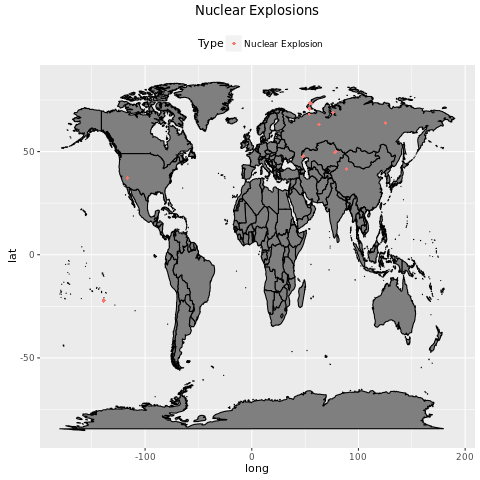

In [22]:
map <- borders("world", colour="black", fill="gray50") 
nuclear_map <- ggplot(nuclear) + map 
print(nuclear_map + geom_point(aes(x=nuclear$Longitude, y=nuclear$Latitude,color=Type),shape=18) +
        theme(legend.position = "top")+
        ggtitle("Nuclear Explosions")+labs(caption="Donyoe"))

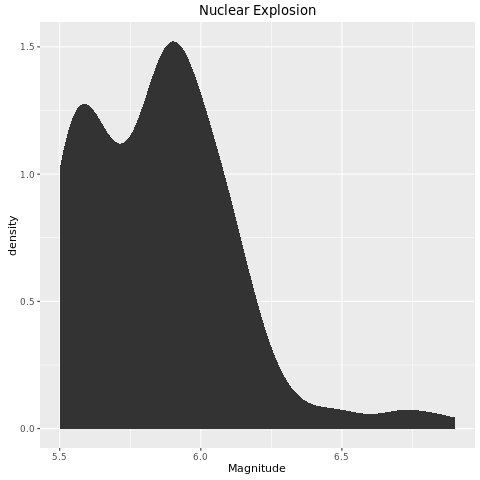

In [23]:
ggplot(nuclear,aes(Magnitude))+
  stat_density()+labs(title="Nuclear Explosion",subtitle="Magnitude",caption="Donyoe")

In [24]:
eaqua <- database[Type=="Earthquake"]

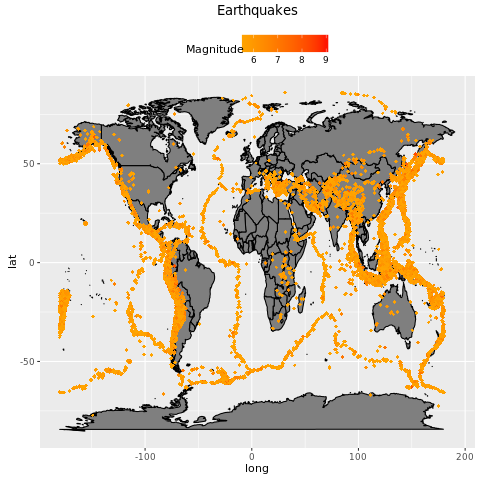

In [26]:
map <- borders("world", colour="black", fill="gray50") 
nuclear_map <- ggplot(eaqua) + map 
print(nuclear_map + geom_point(aes(x=eaqua$Longitude, y=eaqua$Latitude,color=Magnitude),shape=18) +
        scale_color_gradient(low="orange", high="red") +
        theme(legend.position = "top")+
        ggtitle("Earthquakes")+labs(caption="Donyoe"))